Shape: (1000, 10)

Columns: ['timestamp', 'temperature', 'voltage', 'current', 'state_of_charge', 'load', 'speed', 'energy_consumed_kWh', 'battery_health', 'range_km']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            1000 non-null   object 
 1   temperature          1000 non-null   float64
 2   voltage              1000 non-null   float64
 3   current              1000 non-null   float64
 4   state_of_charge      1000 non-null   float64
 5   load                 1000 non-null   float64
 6   speed                1000 non-null   float64
 7   energy_consumed_kWh  1000 non-null   float64
 8   battery_health       1000 non-null   float64
 9   range_km             1000 non-null   float64
dtypes: float64(9), object(1)
memory usage: 78.3+ KB


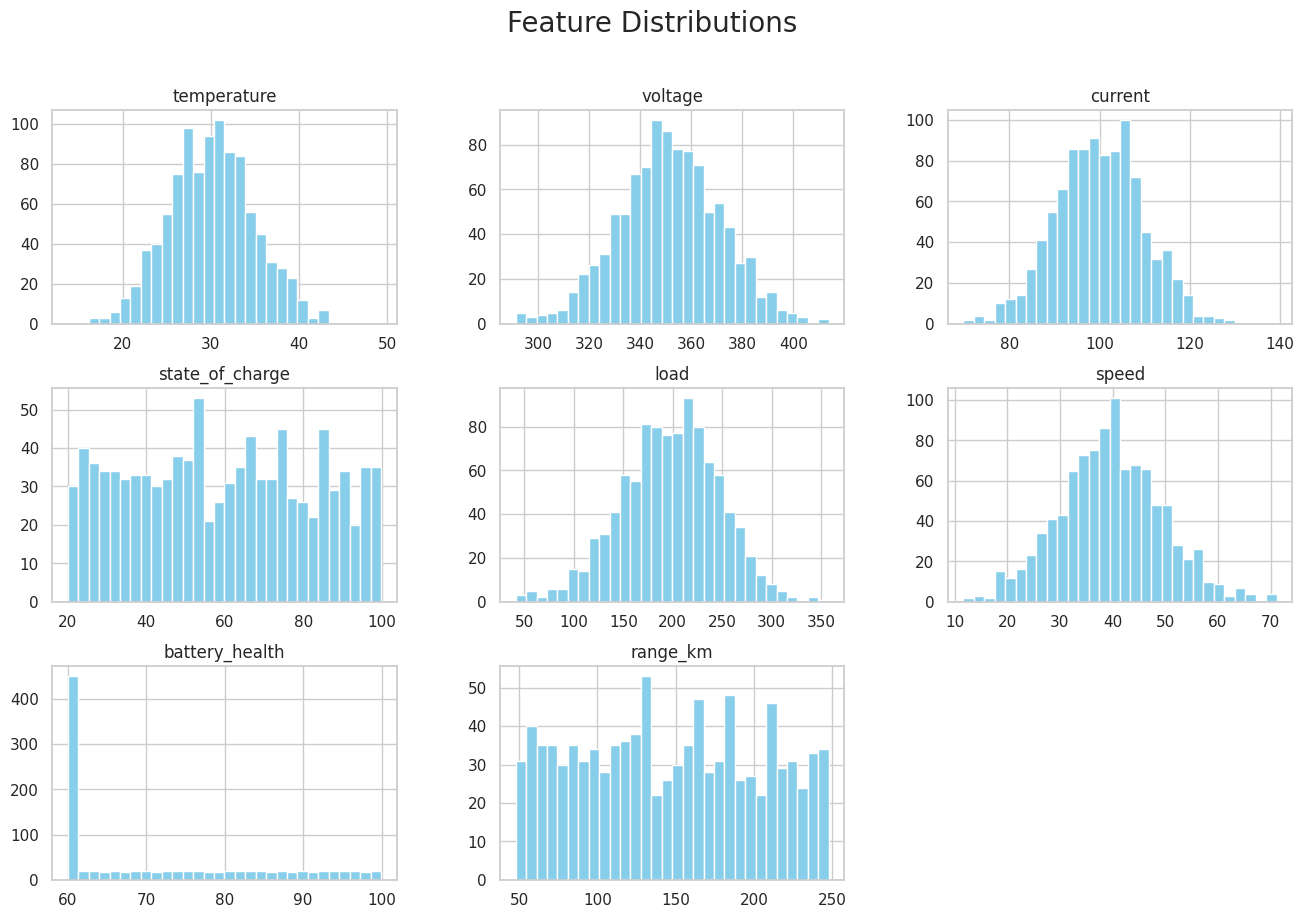

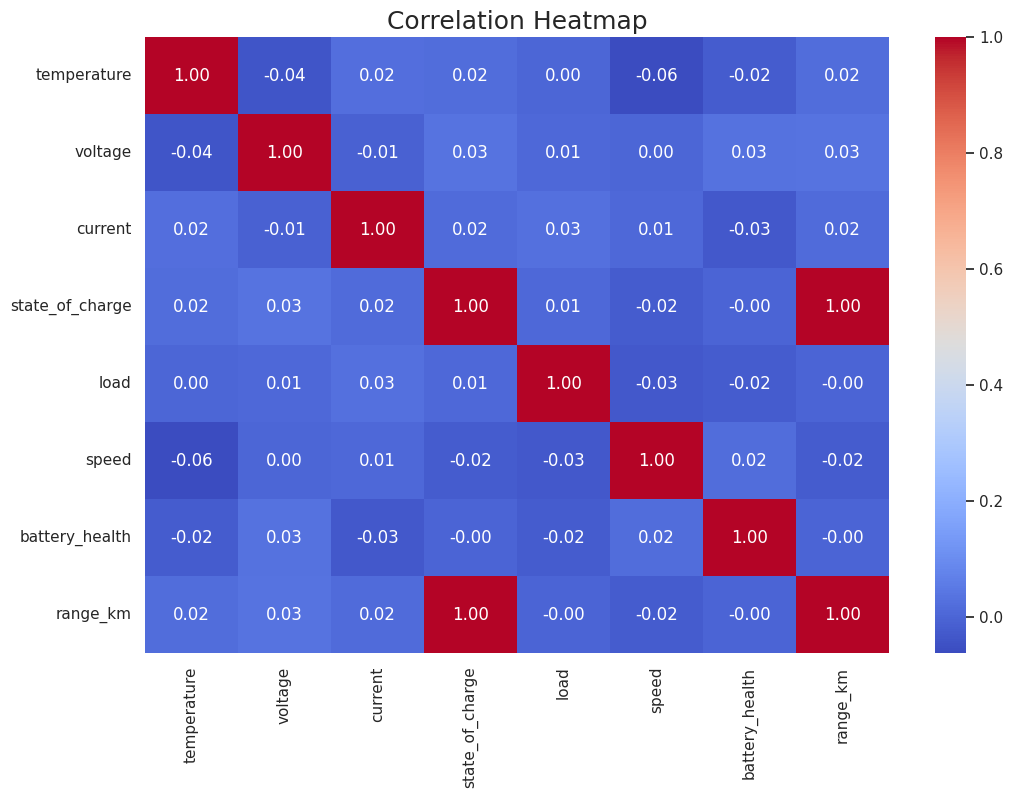

📊 Linear Regression - Battery Health
RMSE: 12.96
R² Score: -0.01

📊 Random Forest - Battery Health
RMSE: 13.73
R² Score: -0.14

📊 Linear Regression - Range
RMSE: 0.00
R² Score: 1.00

📊 Random Forest - Range
RMSE: 0.58
R² Score: 1.00



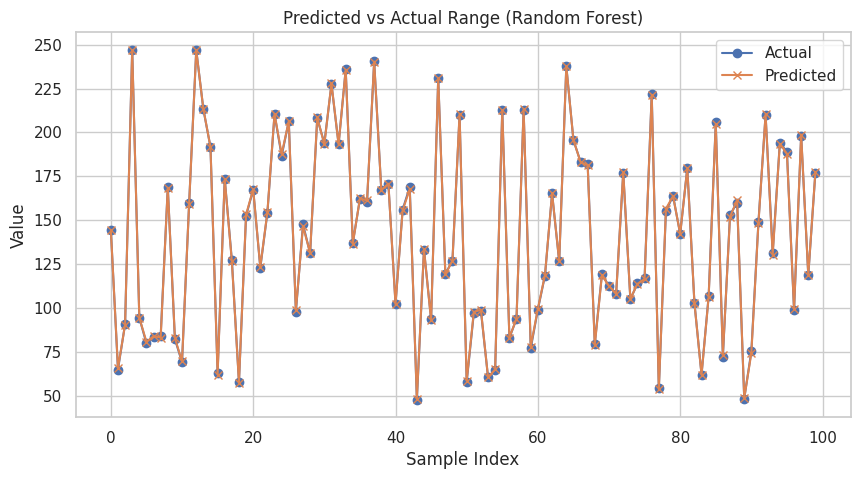

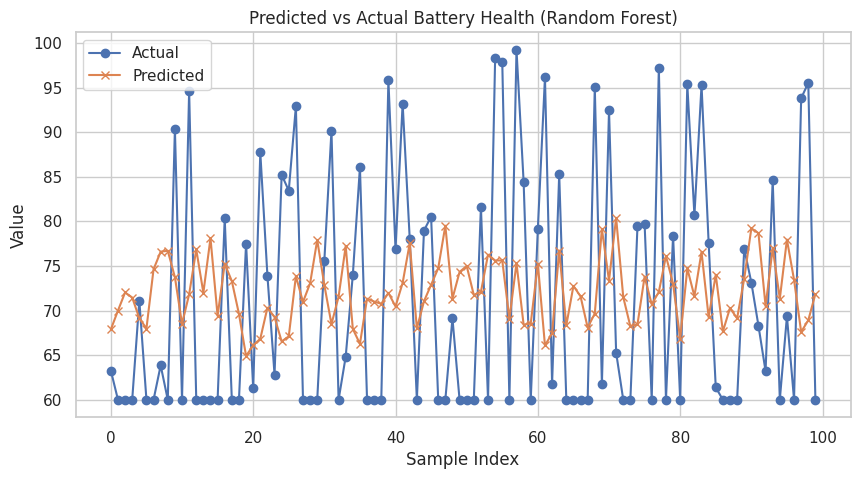

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/ev_sensor_data.csv")

# Preview
df.head()
# Shape and columns
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Info
df.info()
# Summary statistics
df.describe()
# Missing values
df.isnull().sum()
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histograms for main numerical features
features = ['temperature', 'voltage', 'current', 'state_of_charge', 'load', 'speed', 'battery_health', 'range_km']
df[features].hist(bins=30, figsize=(16, 10), color='skyblue')
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=18)
plt.show()
from sklearn.model_selection import train_test_split

# Feature columns to use
feature_cols = ['temperature', 'voltage', 'current', 'state_of_charge', 'load', 'speed', 'energy_consumed_kWh']

# 🟢 Battery Health Prediction
X_health = df[feature_cols]
y_health = df['battery_health']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_health, y_health, test_size=0.2, random_state=42)

# 🔵 Range Prediction
X_range = df[feature_cols]
y_range = df['range_km']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_range, y_range, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ Evaluation Function (Fixed)
def evaluate_model(true, pred, name):
    rmse = np.sqrt(mean_squared_error(true, pred))  # √MSE = RMSE
    r2 = r2_score(true, pred)
    print(f"📊 {name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}\n")

# ----------------------------
# 1️⃣ Battery Health Prediction
# ----------------------------

# Linear Regression
lr_health = LinearRegression()
lr_health.fit(X_train_h, y_train_h)
pred_lr_h = lr_health.predict(X_test_h)

# Random Forest
rf_health = RandomForestRegressor(n_estimators=100, random_state=42)
rf_health.fit(X_train_h, y_train_h)
pred_rf_h = rf_health.predict(X_test_h)

# Evaluation
evaluate_model(y_test_h, pred_lr_h, "Linear Regression - Battery Health")
evaluate_model(y_test_h, pred_rf_h, "Random Forest - Battery Health")

# ------------------------
# 2️⃣ Range Prediction
# ------------------------

# Linear Regression
lr_range = LinearRegression()
lr_range.fit(X_train_r, y_train_r)
pred_lr_r = lr_range.predict(X_test_r)

# Random Forest
rf_range = RandomForestRegressor(n_estimators=100, random_state=42)
rf_range.fit(X_train_r, y_train_r)
pred_rf_r = rf_range.predict(X_test_r)

# Evaluation
evaluate_model(y_test_r, pred_lr_r, "Linear Regression - Range")
evaluate_model(y_test_r, pred_rf_r, "Random Forest - Range")
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 5))
    plt.plot(y_true.values[:100], label='Actual', marker='o')
    plt.plot(y_pred[:100], label='Predicted', marker='x')
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Range Prediction (Random Forest)
plot_predictions(y_test_r, pred_rf_r, "Predicted vs Actual Range (Random Forest)")

# Plot Battery Health Prediction (Random Forest)
plot_predictions(y_test_h, pred_rf_h, "Predicted vs Actual Battery Health (Random Forest)")

